# 11.1 Procesamiento de datos observados de estaciones meteorológicas

Para procesar los datos observados proveniente de estaciones meteorolócas se empleara todos los conocimiento adquiridos en las lecciones previas. En esta lección procesaremos datos observados provenientes de diferentes estaciones meteorológicas, ubicadas y distribuidas a lo largo del territorio del Perú. Estos datos observados **(2017-MES.csv)** se encuentran en el directorio **data**.

In [1]:
def getDataCol(filename, ncol, separador, typeVal="number"):
    fillValue = np.nan
    file = open(filename,'r')
    dataCol = []
    
    if typeVal == "number":
        for line in file.readlines():
            l = line.replace('\n','').split(separador)
            il=l[ncol]
            try:
                dataCol.append(float(il))
            except(ValueError):
                dataCol.append(fillValue)
    elif typeVal=="str":
        for line in file.readlines():
            l = line.replace('\n','').split(separador)
            il=l[ncol]
            dataCol.append(il)
      
    return dataCol

In [2]:
import numpy as np
import matplotlib.pyplot as plt

filename = "./data/2017-MES.csv"

#ESTACIONES METEOROLOGICAS
col0 = getDataCol(filename, 0, separador=";", typeVal="str")  
col1 = getDataCol(filename, 1, separador=";") 
col2 = getDataCol(filename, 2, separador=";") 
col3 = getDataCol(filename, 3, separador=";") 
col4 = getDataCol(filename, 4, separador=";") 
col5 = getDataCol(filename, 5, separador=";") 
col6 = getDataCol(filename, 6, separador=";") 
col7 = getDataCol(filename, 7, separador=";") 
col8 = getDataCol(filename, 8, separador=";") 
col9 = getDataCol(filename, 9, separador=";") 
col10 = getDataCol(filename, 10, separador=";") 
col11 = getDataCol(filename, 11, separador=";") 
col12 = getDataCol(filename, 12, separador=";") 
col13 = getDataCol(filename, 13, separador=";") 
col14 = getDataCol(filename, 14, separador=";") 
col15 = getDataCol(filename, 15, separador=";") 

#PRONOSTICOS MENSUAL
col16 = getDataCol(filename, 16, separador=";")
col17 = getDataCol(filename, 17, separador=";")
col18 = getDataCol(filename, 18, separador=";")

#ESTACIONES METEOROLOGICAS
lons=np.array(col1[1:])
lats=np.array(col2[1:])
col3=np.array(col3[1:])
col4=np.array(col4[1:])
col5=np.array(col5[1:])
col6=np.array(col6[1:])
col7=np.array(col7[1:])
col8=np.array(col8[1:])
col9=np.array(col9[1:])
col10=np.array(col10[1:])
col11=np.array(col11[1:])
col12=np.array(col12[1:])
col13=np.array(col13[1:])
col14=np.array(col14[1:])
col15=np.array(col15[1:])

#PRONOSTICO MENSUAL
col16=np.array(col16[1:])
col17=np.array(col17[1:])
col18=np.array(col18[1:])

dif = col16 - col9

### Visualizar de manera estandar la información

In [3]:
for x,i,j,k,m,n,s in zip(col0,lons,col3,lats,col9,col16,dif):
   print("{0:10} {1:10} {2:10}  {3:10} {4:10} {5:10}".format(x,i,j,k,m,n,s))

ESTACIONES      -78.2      216.0      -9.434        0.0        0.0
BUENAVISTA     -77.55      120.0      -11.05        0.2        0.0
ALCANTARILLA    -77.649       59.0     -10.913        0.9       0.02
CAMAY         -77.367      300.0     -11.367       24.4       0.72
LOMASDELACHAY    -77.117      350.0      -11.45        6.1        0.0
HUAYAN        -76.839      523.0     -11.989        1.9        0.0
NANA          -76.136       60.0     -13.474        2.3       0.49
FONAGRO       -75.966      294.0     -13.763        0.2        0.0
HACIENDABERNALES     -75.22      317.0     -14.542        0.3        0.0
RIOGRANDE     -75.729      398.0     -14.068        0.7        0.0
SANCAMILO     -74.915      600.0     -14.983        0.0        0.0
COPARA        -75.681      313.0     -14.383        0.4       0.31
OCUCAJE       -73.694       20.0     -16.229        0.7       5.06
PUNTAATICO    -71.723      100.0     -17.069        0.6       0.01
PAMPABLANCA    -71.288       75.0     -17.627      

### Graficar la información porcesada en una distribución espacial

/home/vrojas/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:2184: RuntimeWarning: invalid value encountered in less
  condition = (xf < v1) | (xf > v2)
/home/vrojas/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:2184: RuntimeWarning: invalid value encountered in greater
  condition = (xf < v1) | (xf > v2)


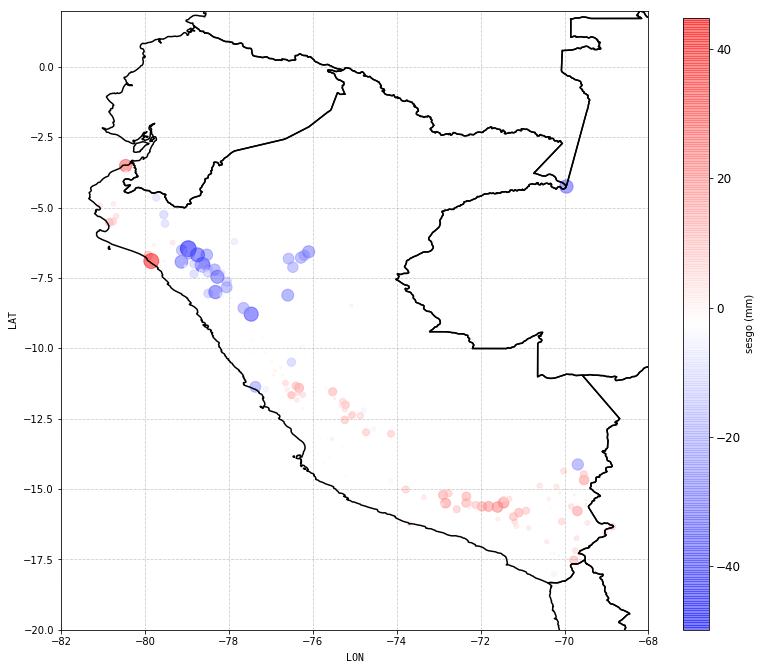

In [7]:
# Enmascarar datos fuera de un rango
import numpy.ma as ma
dif = ma.masked_outside(dif, -50,50)


# Generar gráfico
figure = plt.figure(figsize=(12,10))
ax =figure.add_axes([0.13,0.1,0.68,0.86])

cmap = plt.cm.get_cmap('bwr')
#cmap = plt.cm.get_cmap('jet')
ax.set_xlabel(r'$\mathtt{LON}$')
ax.set_ylabel(r'$\mathtt{LAT}$')
ax.grid(b=True, which='major', color='grey', linestyle='--', alpha=0.4)

# Scatter
sc=ax.scatter(lons, lats, c=dif,s=np.abs(dif)*5, 
               alpha=0.5, 
               marker='o', 
               #vmin=dif.min(), vmax=dif.max(), 
               cmap=cmap)

#colocar shapefile
import shapefile as shp
sf = shp.Reader('./data/shp/Countries_Shape/ne_10m_admin_0_countries.shp')
for shape in sf.shapeRecords():
  # indexando cada componente del mapa
  l = shape.shape.parts
  len_l = len(l) # cantidad de paises i.e. islas y continentes
  xsh = [i[0] for i in shape.shape.points[:]] # lista de latitudes
  ysh = [i[1] for i in shape.shape.points[:]] # lista de longitudes
  l.append(len(xsh)) # asegurar el cierre del último componente
  for k in range(len_l):
    # graficar cada componente del mapa
    # l[k] a l[k + 1] es el conjunto puntos que forman cada componente
    plt.plot(xsh[l[k]:l[k + 1]],ysh[l[k]:l[k + 1]], 'k-')


ax.set_xlim([-82,-68])
ax.set_ylim([-20,2])

# BARRA DE COLOR
name_colobar = "sesgo (mm)"
ax_cbar = figure.add_axes([0.85, 0.1, 0.03, 0.85])			
cbar = plt.colorbar(sc,cax=ax_cbar, orientation='vertical')
cbar.set_label(name_colobar)
cbar.ax.tick_params(labelsize=12)

plt.savefig("./graficos/peru-estaciones.png")
plt.show()